In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-big-dataset-of-ultra-marathon-running/TWO_CENTURIES_OF_UM_RACES
/kaggle/input/the-big-dataset-of-ultra-marathon-running/TWO_CENTURIES_OF_UM_RACES.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:


df = pd.read_csv('/kaggle/input/the-big-dataset-of-ultra-marathon-running/TWO_CENTURIES_OF_UM_RACES.csv', low_memory=False)
df

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461190,1995,00.00.1995,La SainteLyon 65 km (FRA),65km,2,4:33:20 h,NaN,FRA,NaN,M,NaN,14268.0,1151060
7461191,1995,00.00.1995,La SainteLyon 65 km (FRA),65km,2,6:05:15 h,NaN,FRA,NaN,F,NaN,10678.0,1073520
7461192,1995,00.00.1995,Szombathely 24 hours running Race (HUN),24h,3,241.000 km,*Budapest,HUN,1950.0,M,M40,10042.0,1047373
7461193,1995,00.00.1995,Szombathely 24 hours running Race (HUN),24h,3,228.000 km,*Szeged,HUN,1959.0,M,M35,9500.0,380150


In [4]:
df.shape

(7461195, 13)

In [5]:
df.isna().sum()

Year of event                      0
Event dates                        0
Event name                         0
Event distance/length           1053
Event number of finishers          0
Athlete performance                2
Athlete club                 2826524
Athlete country                    3
Athlete year of birth         588161
Athlete gender                     7
Athlete age category          584938
Athlete average speed            224
Athlete ID                         0
dtype: int64

In [6]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [7]:

# CLEAN UP DATA

In [8]:
df.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
5,2018,06.01.2018,Selva Costera (CHI),50km,22,6:25:01 h,NaN,ARG,1974.0,M,M40,7.792,5
6,2018,06.01.2018,Selva Costera (CHI),50km,22,6:28:00 h,Los Patagones,ARG,1979.0,F,W35,7.732,6
7,2018,06.01.2018,Selva Costera (CHI),50km,22,6:32:24 h,Reaktiva Chile,CHI,1967.0,F,W50,7.645,7
8,2018,06.01.2018,Selva Costera (CHI),50km,22,6:39:08 h,Puro Trail Osorno,CHI,1985.0,M,M23,7.516,8
9,2018,06.01.2018,Selva Costera (CHI),50km,22,6:45:11 h,Marlene Flores Team,CHI,1976.0,M,M40,7.404,9


In [9]:
df.isna().sum()

Year of event                      0
Event dates                        0
Event name                         0
Event distance/length           1053
Event number of finishers          0
Athlete performance                2
Athlete club                 2826524
Athlete country                    3
Athlete year of birth         588161
Athlete gender                     7
Athlete age category          584938
Athlete average speed            224
Athlete ID                         0
dtype: int64

In [10]:
df['Event name'].unique()

array(['Selva Costera (CHI)',
       '6 Stunden Self-Transcendence Sri Chinmoy Smolensk (RUS)',
       'Knap Trail - Forhajerska (SLO)', ...,
       'Centenary Lakes 6 Hour Track Run - 50km Split (AUS)',
       'Centenary Lakes 50 Km Track Run (AUS)',
       'Szombathely 24 hours running Race  (HUN)'], dtype=object)

In [11]:
df2=df

### Create a new column by spliting country from Event name

In [12]:
df2['Event Country']=df2['Event name'].str.split(pat='(').str[1]
df2['Event Country']=df2['Event Country'].str.split(pat=')').str[0]


In [13]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Event Country
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0,CHI
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1,CHI
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2,CHI
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3,CHI
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4,CHI


### Remove Event Country from Event Name

In [14]:
df2['Event name']=df2['Event name'].str.split(pat='(').str[0]
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Event Country
0,2018,06.01.2018,Selva Costera,50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0,CHI
1,2018,06.01.2018,Selva Costera,50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1,CHI
2,2018,06.01.2018,Selva Costera,50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2,CHI
3,2018,06.01.2018,Selva Costera,50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3,CHI
4,2018,06.01.2018,Selva Costera,50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4,CHI


In [15]:
df2['Event name'].unique()

array(['Selva Costera ',
       '6 Stunden Self-Transcendence Sri Chinmoy Smolensk ',
       'Knap Trail - Forhajerska ', ...,
       'Centenary Lakes 6 Hour Track Run - 50km Split ',
       'Centenary Lakes 50 Km Track Run ',
       'Szombathely 24 hours running Race  '], dtype=object)

In [16]:
df2['Event name'].isna().sum()

0

In [17]:
df2['Event Country']

0          CHI
1          CHI
2          CHI
3          CHI
4          CHI
          ... 
7461190    FRA
7461191    FRA
7461192    HUN
7461193    HUN
7461194    HUN
Name: Event Country, Length: 7461195, dtype: object

### Clean up Athlete age

In [18]:
df2['Athlete_Age'] = 2020 - df['Athlete year of birth']
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Event Country,Athlete_Age
0,2018,06.01.2018,Selva Costera,50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0,CHI,42.0
1,2018,06.01.2018,Selva Costera,50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1,CHI,39.0
2,2018,06.01.2018,Selva Costera,50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2,CHI,33.0
3,2018,06.01.2018,Selva Costera,50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3,CHI,44.0
4,2018,06.01.2018,Selva Costera,50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4,CHI,28.0


In [19]:
df2[df2['Athlete_Age'].isna()==1]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Event Country,Athlete_Age
11,2018,06.01.2018,Selva Costera,50km,22,7:09:58 h,Rocoto Team,CHI,NaN,M,NaN,6.977,11,CHI,NaN
19,2018,06.01.2018,Selva Costera,50km,22,8:13:16 h,Santiago Mountain Runn...,CHI,NaN,M,NaN,6.082,19,CHI,NaN
20,2018,06.01.2018,Selva Costera,50km,22,8:13:28 h,MEF Ularunners,CHI,NaN,M,NaN,6.079,20,CHI,NaN
26,2018,06.01.2018,6 Stunden Self-Transcendence Sri Chinmoy Smole...,6h,9,55.375 km,Endurance,RUS,NaN,M,NaN,9.229,26,RUS,NaN
29,2018,06.01.2018,6 Stunden Self-Transcendence Sri Chinmoy Smole...,6h,9,50.500 km,Лично,RUS,NaN,M,NaN,8.417,29,RUS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461079,1995,07.01.1995,Centenary Lakes 6 Hour Track Run - 50km Split,50km,15,5:40:24 h,*QLD,AUS,NaN,M,NaN,8813.0,1641166,AUS,NaN
7461081,1995,07.01.1995,Centenary Lakes 6 Hour Track Run - 50km Split,50km,15,5:42:46 h,*QLD,AUS,NaN,M,NaN,8752.0,1093063,AUS,NaN
7461086,1995,07.01.1995,Centenary Lakes 6 Hour Track Run - 50km Split,50km,15,5:49:58 h,*Old,AUS,NaN,F,NaN,8572.0,1641111,AUS,NaN
7461190,1995,00.00.1995,La SainteLyon 65 km,65km,2,4:33:20 h,NaN,FRA,NaN,M,NaN,14268.0,1151060,FRA,NaN


In [20]:
df2 = df2.dropna(subset=['Athlete_Age'])

In [21]:
df2['Athlete_Age'].isna().sum()

0

### Fix duplicated

In [22]:
df2[df2.duplicated()==True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Event Country,Athlete_Age
577695,2018,31.12.2018-01.01.2019,"Across the Years, 24h",24h,173,50.684 km,"*West Hills, CA",USA,1958.0,F,W60,2.112,340660,USA,62.0
577697,2018,31.12.2018-01.01.2019,"Across the Years, 24h",24h,173,50.684 km,"*West Hills, CA",USA,1958.0,F,W60,2.112,340660,USA,62.0
970871,2016,17.-18.08.2016,Silverton 24 hour Challenge,24h,6,49.889 km,"*North Las Vegas, NV",USA,1968.0,F,W45,2.079,375392,USA,52.0
970872,2016,17.-18.08.2016,Silverton 24 hour Challenge,24h,6,49.889 km,"*North Las Vegas, NV",USA,1968.0,F,W45,2.079,375392,USA,52.0
1116779,2016,28.12.2016-03.01.2017,"Across the Years, 24h",24h,139,81.095 km,"*Mesa, AZ",USA,1945.0,F,W70,3.379,76091,USA,75.0
1116780,2016,28.12.2016-03.01.2017,"Across the Years, 24h",24h,139,81.095 km,"*Mesa, AZ",USA,1945.0,F,W70,3.379,76091,USA,75.0
1116822,2016,28.12.2016-03.01.2017,"Across the Years, 24h",24h,139,55.753 km,"*North Las Vegas, NV",USA,1968.0,F,W45,2.323,375392,USA,52.0
1204313,2017,18.02.2017,Black Canyon Trail 60 Km Run,60km,110,9:21:17 h,"*Shiprock, NM",USA,1975.0,F,W40,6.414,42964,USA,45.0
1447945,2017,21.07.2017,Self-Transcendence Race 48 Std. Kladno - 12h S...,12h,47,70.000 km,NaN,DEN,1976.0,M,M40,5.833,28500,CZE,44.0
1853512,2019,26.01.2019,North Face 100 Thailand - 100 Km,100km,141,18:13:51 h,NaN,BRU,1989.0,M,M23,5.485,146232,THA,31.0


In [23]:
df2 = df2.drop_duplicates()

In [24]:
df2[df2.duplicated()==True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Event Country,Athlete_Age


In [25]:
df2.isna().sum()

Year of event                      0
Event dates                        0
Event name                         0
Event distance/length            968
Event number of finishers          0
Athlete performance                0
Athlete club                 2452099
Athlete country                    0
Athlete year of birth              0
Athlete gender                     3
Athlete age category             198
Athlete average speed            220
Athlete ID                         0
Event Country                      0
Athlete_Age                        0
dtype: int64

### Drop Columns (Athlete Club, Athlete Age Category) & Clean Null Values

In [26]:
df2=df2.drop(['Athlete club','Athlete age category'],axis=1)
df2.head(3)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed,Athlete ID,Event Country,Athlete_Age
0,2018,06.01.2018,Selva Costera,50km,22,4:51:39 h,CHI,1978.0,M,10.286,0,CHI,42.0
1,2018,06.01.2018,Selva Costera,50km,22,5:15:45 h,CHI,1981.0,M,9.501,1,CHI,39.0
2,2018,06.01.2018,Selva Costera,50km,22,5:16:44 h,CHI,1987.0,M,9.472,2,CHI,33.0


In [27]:
df2= df2.dropna()

In [28]:
df2.isna().sum()

Year of event                0
Event dates                  0
Event name                   0
Event distance/length        0
Event number of finishers    0
Athlete performance          0
Athlete country              0
Athlete year of birth        0
Athlete gender               0
Athlete average speed        0
Athlete ID                   0
Event Country                0
Athlete_Age                  0
dtype: int64

In [29]:
df2.shape

(6871818, 13)

In [30]:
df2.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed,Athlete ID,Event Country,Athlete_Age
0,2018,06.01.2018,Selva Costera,50km,22,4:51:39 h,CHI,1978.0,M,10.286,0,CHI,42.0
1,2018,06.01.2018,Selva Costera,50km,22,5:15:45 h,CHI,1981.0,M,9.501,1,CHI,39.0
2,2018,06.01.2018,Selva Costera,50km,22,5:16:44 h,CHI,1987.0,M,9.472,2,CHI,33.0
3,2018,06.01.2018,Selva Costera,50km,22,5:34:13 h,ARG,1976.0,M,8.976,3,CHI,44.0
4,2018,06.01.2018,Selva Costera,50km,22,5:54:14 h,CHI,1992.0,M,8.469,4,CHI,28.0
5,2018,06.01.2018,Selva Costera,50km,22,6:25:01 h,ARG,1974.0,M,7.792,5,CHI,46.0
6,2018,06.01.2018,Selva Costera,50km,22,6:28:00 h,ARG,1979.0,F,7.732,6,CHI,41.0
7,2018,06.01.2018,Selva Costera,50km,22,6:32:24 h,CHI,1967.0,F,7.645,7,CHI,53.0
8,2018,06.01.2018,Selva Costera,50km,22,6:39:08 h,CHI,1985.0,M,7.516,8,CHI,35.0
9,2018,06.01.2018,Selva Costera,50km,22,6:45:11 h,CHI,1976.0,M,7.404,9,CHI,44.0


## df3 : New data frame for the US Races of 2020, 50mi and 50km

In [31]:
df2[df2['Event distance/length']=='50mi']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed,Athlete ID,Event Country,Athlete_Age
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,9:53:05 h,USA,1983.0,M,8.141,55,USA,37.0
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:09:35 h,CAN,1977.0,F,7.211,56,USA,43.0
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:33:00 h,CAN,1976.0,M,6.967,57,USA,44.0
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:38:17 h,USA,1986.0,M,6.914,58,USA,34.0
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:56:35 h,USA,1988.0,M,6.738,59,USA,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run,50mi,92,11:59:37 h,USA,1941.0,M,6709.0,1045603,USA,79.0
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run,50mi,92,12:01:41 h,USA,1932.0,M,6690.0,1070463,USA,88.0
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run,50mi,92,12:03:26 h,USA,1934.0,F,6674.0,416139,USA,86.0
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run,50mi,92,12:03:26 h,USA,1951.0,F,6674.0,1098098,USA,69.0


In [32]:
df2[df2['Event distance/length']=='50km']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed,Athlete ID,Event Country,Athlete_Age
0,2018,06.01.2018,Selva Costera,50km,22,4:51:39 h,CHI,1978.0,M,10.286,0,CHI,42.0
1,2018,06.01.2018,Selva Costera,50km,22,5:15:45 h,CHI,1981.0,M,9.501,1,CHI,39.0
2,2018,06.01.2018,Selva Costera,50km,22,5:16:44 h,CHI,1987.0,M,9.472,2,CHI,33.0
3,2018,06.01.2018,Selva Costera,50km,22,5:34:13 h,ARG,1976.0,M,8.976,3,CHI,44.0
4,2018,06.01.2018,Selva Costera,50km,22,5:54:14 h,CHI,1992.0,M,8.469,4,CHI,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461089,1995,07.01.1995,Centenary Lakes 50 Km Track Run,50km,6,4:19:56 h,AUS,1956.0,F,11541.0,1046326,AUS,64.0
7461090,1995,07.01.1995,Centenary Lakes 50 Km Track Run,50km,6,4:28:57 h,AUS,1954.0,M,11154.0,1070007,AUS,66.0
7461091,1995,07.01.1995,Centenary Lakes 50 Km Track Run,50km,6,4:46:39 h,AUS,1951.0,M,10466.0,345672,AUS,69.0
7461092,1995,07.01.1995,Centenary Lakes 50 Km Track Run,50km,6,4:47:39 h,AUS,1939.0,M,10429.0,1082443,AUS,81.0


In [33]:
df3=df2[(df2['Event distance/length'].isin(['50km','50mi']))& (df2['Year of event']==2020)&(df2['Event Country']== 'USA')]


In [34]:
df3.shape

(25857, 13)

In [35]:
df3.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed,Athlete ID,Event Country,Athlete_Age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,USA,1991.0,M,15.158,71287,USA,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,USA,1981.0,M,12.369,629508,USA,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,USA,1999.0,M,12.099,64838,USA,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,USA,1983.0,M,11.449,704450,USA,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,USA,1977.0,M,11.212,810281,USA,43.0


### Remove 'h' from athlete performance

In [36]:
df3['Athlete performance']=df3['Athlete performance'].str.split(' ').str.get(0)
df3.head()

/tmp/ipykernel_17/3939536218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Athlete performance']=df3['Athlete performance'].str.split(' ').str.get(0)


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed,Athlete ID,Event Country,Athlete_Age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,USA,1991.0,M,15.158,71287,USA,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,USA,1981.0,M,12.369,629508,USA,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,USA,1999.0,M,12.099,64838,USA,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,USA,1983.0,M,11.449,704450,USA,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,USA,1977.0,M,11.212,810281,USA,43.0


### Creating a new default index

In [37]:
df3.reset_index(drop=True)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed,Athlete ID,Event Country,Athlete_Age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,USA,1991.0,M,15.158,71287,USA,29.0
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,USA,1981.0,M,12.369,629508,USA,39.0
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,USA,1999.0,M,12.099,64838,USA,21.0
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,USA,1983.0,M,11.449,704450,USA,37.0
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,USA,1977.0,M,11.212,810281,USA,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25852,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,USA,1958.0,F,7.013,816361,USA,62.0
25853,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,USA,1977.0,F,6.706,326469,USA,43.0
25854,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,USA,1962.0,F,6.705,372174,USA,58.0
25855,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,USA,1981.0,F,6.543,860349,USA,39.0


### Rename Columns

In [38]:
df3=df3.rename(columns={'Year of event':'Year',  
                        'Event dates':'Race_day',                
                        'Event name' :'Race_name',               
                        'Event distance/length':'Race_length',        
                        'Event number of finishers':'Race_number_of_finishers', 
                        'Athlete performance':'Athlete_performance',
                        'Athlete year of birth':'Athlete_year_of_birth',
                        'Athlete country':'Athlete_country',
                        'Athlete gender':'Athlete_gender',
                        'Athlete average speed':'Athlete_avg_speed',
                        'Event Country' :'Race_country',    
                        'Athlete ID':'Athlete_ID',
                        'Athlete_Age' : 'Age_of_athlete',    
})

df3.head(2)

,Year,Race_day,Race_name,Race_length,Race_number_of_finishers,Athlete_performance,Athlete_country,Athlete_year_of_birth,Athlete_gender,Athlete_avg_speed,Athlete_ID,Race_country,Age_of_athlete
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,USA,1991.0,M,15.158,71287,USA,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,USA,1981.0,M,12.369,629508,USA,39.0


### Fixing Type

In [39]:
df3.dtypes

Year                          int64
Race_day                     object
Race_name                    object
Race_length                  object
Race_number_of_finishers      int64
Athlete_performance          object
Athlete_country              object
Athlete_year_of_birth       float64
Athlete_gender               object
Athlete_avg_speed            object
Athlete_ID                    int64
Race_country                 object
Age_of_athlete              float64
dtype: object

In [40]:
df3['Race_number_of_finishers'] = df3['Race_number_of_finishers'].astype(int)
df3['Athlete_year_of_birth']=df3['Athlete_year_of_birth'].astype(int)
df3['Athlete_avg_speed']=df3['Athlete_avg_speed'].astype(float)
df3['Age_of_athlete']=df3['Age_of_athlete'].astype(int)


In [41]:
df3.dtypes

Year                          int64
Race_day                     object
Race_name                    object
Race_length                  object
Race_number_of_finishers      int64
Athlete_performance          object
Athlete_country              object
Athlete_year_of_birth         int64
Athlete_gender               object
Athlete_avg_speed           float64
Athlete_ID                    int64
Race_country                 object
Age_of_athlete                int64
dtype: object

# Charts

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='Race_length', ylabel='Count'>

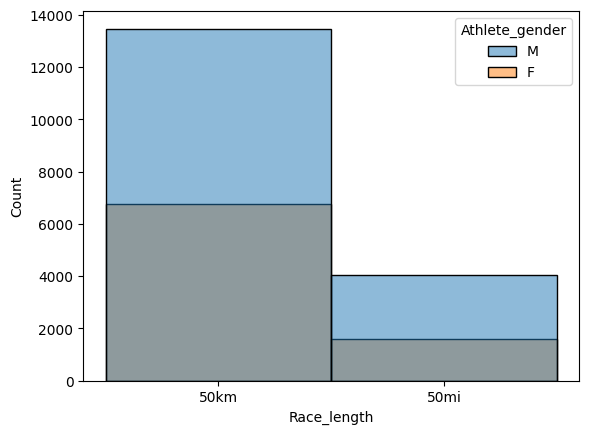

In [42]:
sns.histplot(df3, x='Race_length', hue='Athlete_gender')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


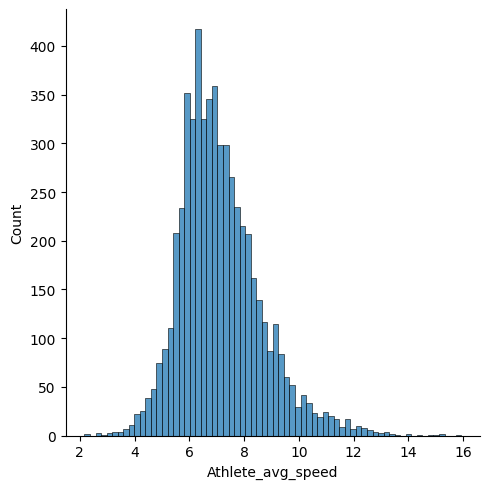

In [43]:
sns.displot(df3[df3['Race_length']=='50mi']['Athlete_avg_speed'])

<Axes: xlabel='Race_length', ylabel='Athlete_avg_speed'>

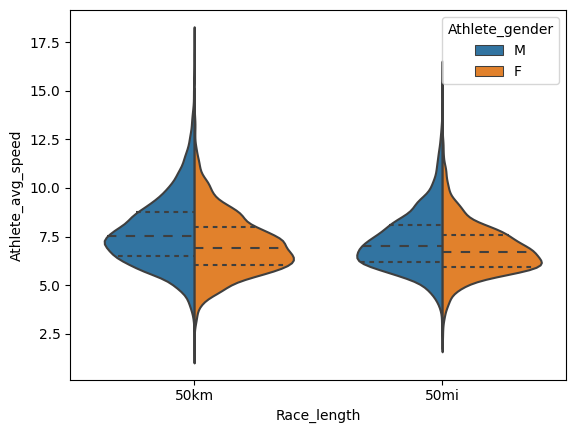

In [44]:
sns.violinplot(data=df3, x='Race_length', y='Athlete_avg_speed',hue='Athlete_gender',split=True,inner='quart',linewith=1)

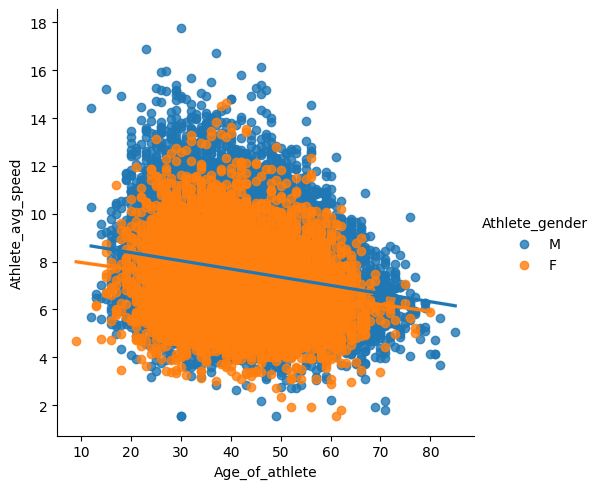

In [45]:
sns.lmplot(data=df3,x='Age_of_athlete', y='Athlete_avg_speed',hue='Athlete_gender')

In [46]:
df3.head(2)

,Year,Race_day,Race_name,Race_length,Race_number_of_finishers,Athlete_performance,Athlete_country,Athlete_year_of_birth,Athlete_gender,Athlete_avg_speed,Athlete_ID,Race_country,Age_of_athlete
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,USA,1991,M,15.158,71287,USA,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,USA,1981,M,12.369,629508,USA,39


#### Different in speed for the 50km,50mi male to female

In [47]:
df3.groupby(['Race_length','Athlete_gender'])['Athlete_avg_speed'].mean()

Race_length  Athlete_gender
50km         F                 7.083011
             M                 7.738985
50mi         F                 6.834371
             M                 7.257633
Name: Athlete_avg_speed, dtype: float64

#### What are groups are the best in the 50mi race(20 + races min)

In [48]:
df3.query('Race_length== "50mi"').groupby('Age_of_athlete')['Athlete_avg_speed'].agg(['mean','count']).sort_values('mean',ascending=False).query('count>19')

,mean,count
Age_of_athlete,,
29,7.902252,135
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.540923,91
31,7.451638,138
38,7.430022,231
35,7.422359,195
36,7.403854,185


#### What are groups are the worst in the 50mi race(10 + races min) (show 15)

In [49]:
df3.query('Race_length== "50mi"').groupby('Age_of_athlete')['Athlete_avg_speed'].agg(['mean','count']).sort_values('mean',ascending=True).query('count>9').head(15)

,mean,count
Age_of_athlete,,
70,5.470667,12
65,5.934786,14
68,5.957500,10
67,6.114909,11
66,6.194300,10
60,6.261788,33
62,6.272730,37
61,6.358355,31
63,6.514806,31


### Seasons for the data
#### Slower in summer than winter?
##### Spring 3-5
##### Summer 6-8
##### Fall   9-11
##### Winter 12-2

In [50]:
df3['Race_month']=df3['Race_day'].str.split('.').str.get(1).astype(int)

In [51]:
df3.head(3)

,Year,Race_day,Race_name,Race_length,Race_number_of_finishers,Athlete_performance,Athlete_country,Athlete_year_of_birth,Athlete_gender,Athlete_avg_speed,Athlete_ID,Race_country,Age_of_athlete,Race_month
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,USA,1991,M,15.158,71287,USA,29,2
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,USA,1981,M,12.369,629508,USA,39,2
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,USA,1999,M,12.099,64838,USA,21,2


In [52]:
df3['Race_season']=df3['Race_month'].apply(lambda x: 'Winter' if x>11 else 'Fall' if x>8 else 'Summer' if x>5 else 'Spring' if x>2 else 'Winter')

In [53]:
df3.head(5)

,Year,Race_day,Race_name,Race_length,Race_number_of_finishers,Athlete_performance,Athlete_country,Athlete_year_of_birth,Athlete_gender,Athlete_avg_speed,Athlete_ID,Race_country,Age_of_athlete,Race_month,Race_season
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,USA,1991,M,15.158,71287,USA,29,2,Winter
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,USA,1981,M,12.369,629508,USA,39,2,Winter
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,USA,1999,M,12.099,64838,USA,21,2,Winter
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,USA,1983,M,11.449,704450,USA,37,2,Winter
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,USA,1977,M,11.212,810281,USA,43,2,Winter


In [54]:
df3.groupby('Race_season')['Athlete_avg_speed'].agg(['mean','count']).sort_values('mean', ascending=False)

,mean,count
Race_season,,
Spring,7.684430,3294
Winter,7.518187,11595
Fall,7.406619,8315
Summer,6.869336,2653
